In [2]:
import numpy
import pylab
import pandas
import matplotlib.pyplot as plt
import math
from pandas import Series

In [3]:
Belg_total_confirmed = numpy.loadtxt(open("E:/Belgium_Data/total_cases.csv","rb"),delimiter=",",skiprows=0)
Belg_total_vaccinated = numpy.loadtxt(open("E:/Belgium_Data/total_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Belg_new_vaccinated = numpy.loadtxt(open("E:/Belgium_Data/new_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Belg_new_confirmed = numpy.loadtxt(open("E:/Belgium_Data/new_cases.csv","rb"),delimiter=",",skiprows=0)

In [4]:
print(len(Belg_new_confirmed))
print(len(Belg_total_confirmed))
print(len(Belg_new_vaccinated))
print(len(Belg_total_vaccinated))

470
470
470
470


10008040.600000001

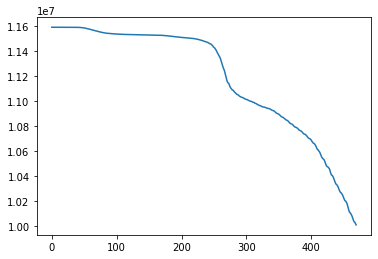

In [5]:
# 总人口
total_person = 11589616
# 疫苗作用率
# immune_rate = 0.4
# 传播率
# beta  = 0.02  
#疫苗在人群中的作用率
alpha = 0.1
# 每日新增
Belg_new_confirmed = list(Belg_new_confirmed)
# 总共确诊
Belg_total_confirmed = list(Belg_total_confirmed)
# 总共接种
Belg_total_vaccinated = list(Belg_total_vaccinated)
# 当日接种
Belg_new_vaccinated = list(Belg_new_vaccinated)

# 分别将total_confirmed ,new_confirmed,total_vaccinated 转化成int
new_confirmed = []
for i in Belg_new_confirmed:
    i = int(i)
    new_confirmed.append(i)
    
total_vaccinated = []
for i in Belg_total_vaccinated:
    i = int(i)
    total_vaccinated.append(i)
    
total_confirmed = []
for i in Belg_total_confirmed:
    i = int(i)
    total_confirmed.append(i)

new_vaccinated = []
for i in Belg_new_vaccinated:
    i = int(i)*alpha
    new_vaccinated.append(i)
# # 每日新增人数与疫苗人数之和
I_add_V = list(map(lambda x:(x[0]+x[1]),zip(new_confirmed,new_vaccinated))) 

Suspectible = []
for i in I_add_V:
    total_person = total_person - i
    Suspectible.append(total_person)
    
# # pylab.xlim(300,410)   
plot1 = pylab.plot(Suspectible, label='Suspectible')
Suspectible[-1]
# plot2 = pylab.plot(I_add_V)

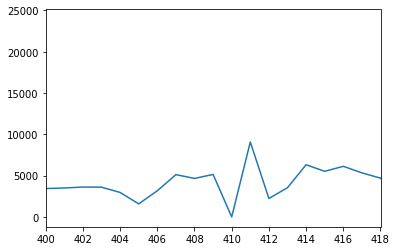

In [6]:
pylab.xlim(400,418)
plot1 = pylab.plot(new_confirmed)
# 411

 AIR of turning point =  0.07894676452209903


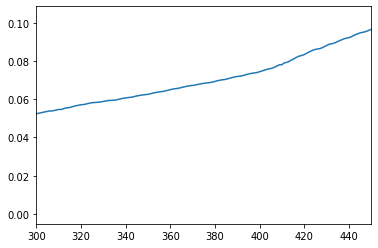

In [7]:
beta = list(map(lambda x:(x[0]/x[1]),zip(total_confirmed,Suspectible))) 
pylab.xlim(300,450) 

print(" AIR of turning point = ",(beta[411]))
plot2 = pylab.plot(beta, label='beta') 

In [8]:
Belg_beta_pd= pandas.DataFrame(beta) 
Belg_beta_pd.to_csv('E:/Belgium_Data/beta.csv',index=False,mode='a',header=None)
print(len(beta))
print(len(Suspectible))

470
470


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters


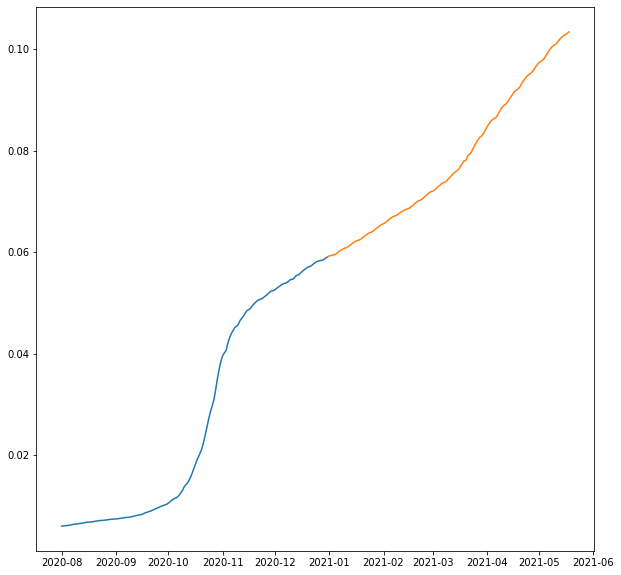

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
Belg_beta = pd.read_csv('E:/Belgium_Data/beta.csv',index_col = 'Date',parse_dates=['Date'])
 
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
sub = Belg_beta['2020/8':'2021/5']['Beta']
train = sub.ix['2020/8/01':'2020/12/31']
# print(type(train))
test = sub.ix['2020/12/31':'2021/5/18']
plt.figure(figsize=(10,10))
# print(train)
plt.plot(train)
plt.plot(test)
plt.show()

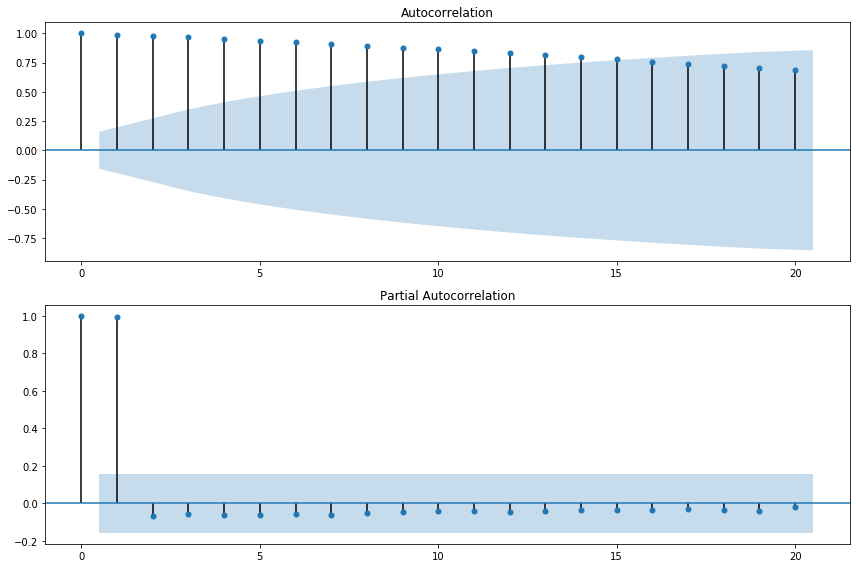

In [10]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWar

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


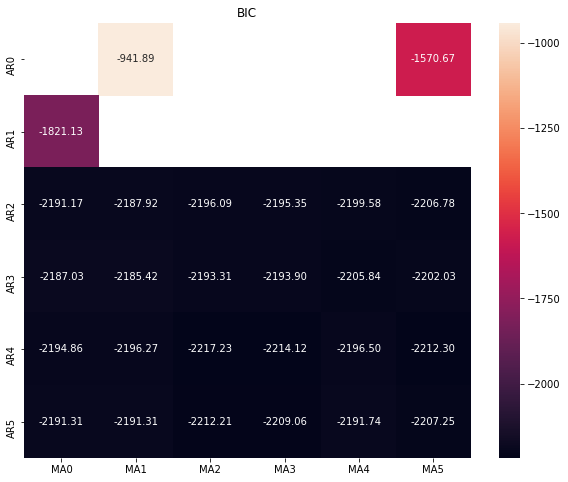

In [11]:
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [12]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWar

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

AIC (8, 6)
BIC (7, 4)


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 864x576 with 0 Axes>

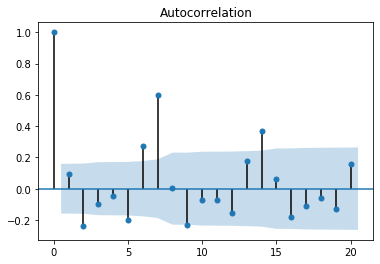

In [13]:
model = sm.tsa.ARIMA(train, order=(1, 1, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2020-08-01    0.057378
2020-08-02    0.006028
2020-08-03    0.006106
2020-08-04    0.006149
2020-08-05    0.006170
2020-08-06    0.006230
2020-08-07    0.006331
2020-08-08    0.006392
2020-08-09    0.006439
2020-08-10    0.006510
2020-08-11    0.006535
2020-08-12    0.006577
2020-08-13    0.006647
2020-08-14    0.006681
2020-08-15    0.006792
2020-08-16    0.006837
2020-08-17    0.006856
2020-08-18    0.006869
2020-08-19    0.006907
2020-08-20    0.006982
2020-08-21    0.007045
2020-08-22    0.007101
2020-08-23    0.007134
2020-08-24    0.007173
2020-08-25    0.007174
2020-08-26    0.007223
2020-08-27    0.007287
2020-08-28    0.007316
2020-08-29    0.007354
2020-08-30    0.007413
                ...   
2021-04-19    0.092274
2021-04-20    0.092502
2021-04-21    0.093025
2021-04-22    0.093782
2021-04-23    0.094254
2021-04-24    0.094599
2021-04-25    0.095038
2021-04-26    0.095198
2021-04-27    0.095510
2021-04-28    0.095945
2021-04-29    0.096508
2021-04-30    0.096993
2021-05-01 

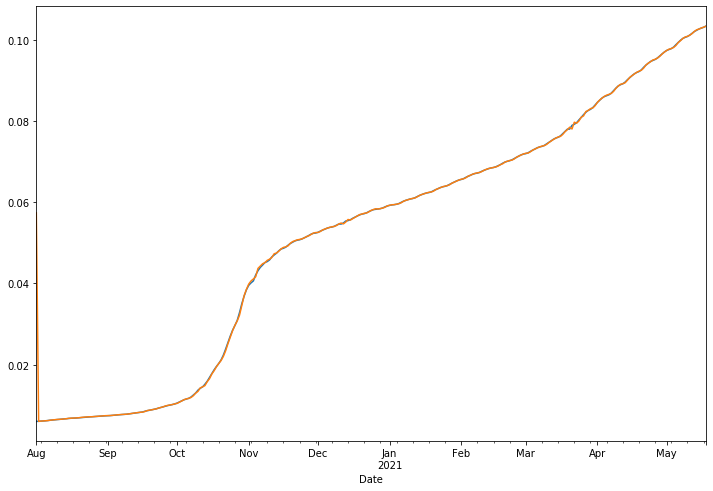

In [14]:
model = sm.tsa.ARIMA(sub, order=(7,0,1))
results = model.fit()
predict_sunspots = results.predict()
predict_beta = results.predict()
print(predict_beta)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [19]:
predict_beta_df = predict_beta.to_frame()
type(predict_beta_df)
predict_beta_df.to_csv('E:/Belgium_Data/beta_predict.csv',index=False,mode='a',header=None)

In [20]:
total_cases_predict = list(map(lambda x:(x[0]*x[1]),zip(predict_beta,Suspectible)))
total_cases_predict = pandas.DataFrame(total_cases_predict)
total_cases_predict.to_csv('E:/Belgium_Data/total_confirmed_predict.csv',index=False,mode='a',header=None)

In [ ]:
new_cases_predict[2:]

In [37]:
predict_cases_df =pandas.DataFrame(new_cases_predict)
# type(predict_beta_df)
predict_cases_df.to_csv('E:/Belgium_Data/cases_predict.csv',index=False,mode='a',header=None)

In [5]:
Belgium_SI = numpy.loadtxt(open("E:/Belgium_Data/Strigency_index.csv","rb"),delimiter=",",skiprows=0)

In [6]:
population_denisty = 375.564
PSI = []
for i in Belgium_SI:
    psi = population_denisty/i
    PSI.append(psi)

In [7]:
Belgium_PSI = pandas.DataFrame(PSI)
Belgium_PSI.to_csv('E:/Belgium_Data/Belgium_PSI.csv',index=False,mode='a',header=None)

In [16]:
AIR_PSI = list(map(lambda x:(x[0]/x[1]),zip(beta,PSI))) 

In [1]:
AIR_PSI

NameError: name 'AIR_PSI' is not defined

In [18]:
Belgium_AIR_PSI = pandas.DataFrame(AIR_PSI)
Belgium_AIR_PSI.to_csv('E:/Belgium_Data/Belgium_AIR_PSI.csv',index=False,mode='a',header=None)